# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
previsao = pd.read_csv("previsao_de_renda.csv")
previsao.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [44]:
previsao.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [48]:
interesse = ['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos','idade', 'index', 'renda', 'tempo_emprego']
previsao[interesse]

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,index,renda,tempo_emprego
0,False,True,1,36,8682,3369.24,3.575342
1,True,True,0,42,12830,6096.14,0.860274
2,True,True,2,31,2885,5658.98,8.065753
3,True,False,0,50,16168,7246.69,1.208219
4,False,False,0,52,12438,4017.37,13.873973
...,...,...,...,...,...,...,...
14995,True,True,1,37,3678,1193.29,2.046575
14996,True,True,1,30,3405,2519.18,12.079452
14997,True,True,0,40,7944,1586.85,2.161644
14998,False,True,0,47,16019,6975.39,3.295890


In [56]:
previsao[interesse].corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,index,renda,tempo_emprego
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.007542,0.063414,-0.087514
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,-0.099683,0.029827,0.000112
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,0.039734,0.009567,-0.074250
idade,-0.157837,0.122667,-0.364303,1.000000,-0.047971,0.042570,0.323934
index,-0.007542,-0.099683,0.039734,-0.047971,1.000000,-0.001740,-0.034574
renda,0.063414,0.029827,0.009567,0.042570,-0.001740,1.000000,0.394235
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,-0.034574,0.394235,1.000000


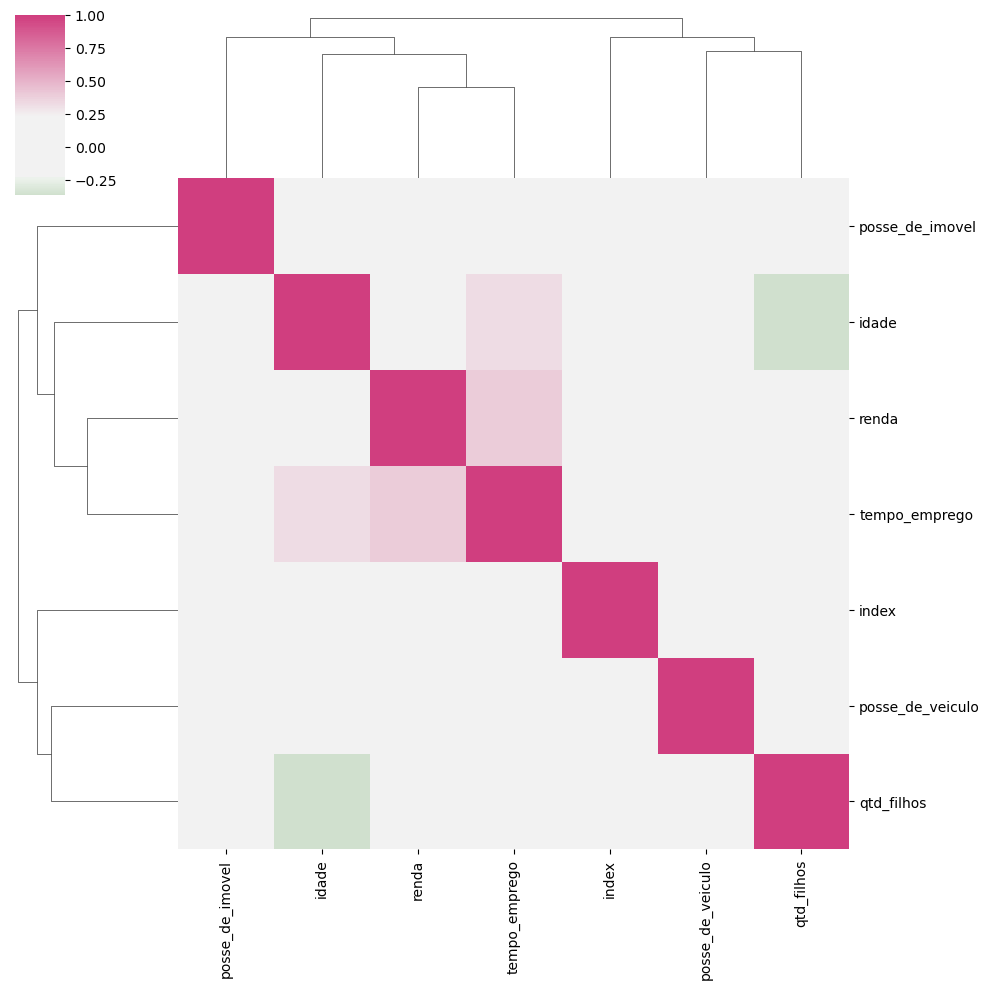

In [52]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(previsao[interesse].corr(), figsize=(10, 10), center = 0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

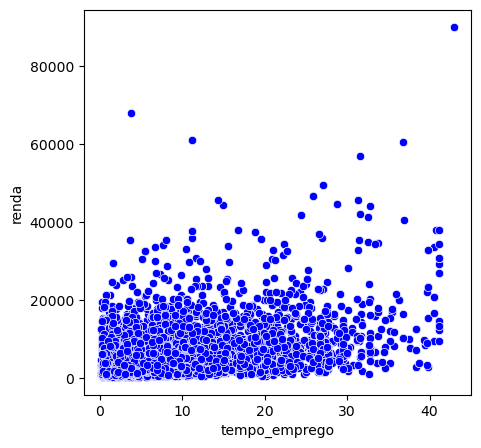

In [60]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=previsao['tempo_emprego'], y=previsao['renda'], color='blue');
plt.xlabel('tempo_emprego')
plt.ylabel('renda')
plt.show()

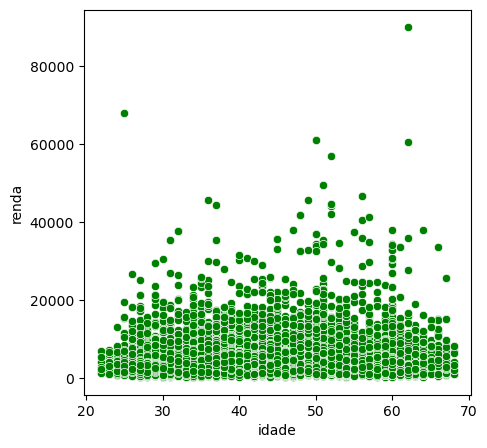

In [62]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=previsao['idade'], y=previsao['renda'], color='green');
plt.xlabel('idade')
plt.ylabel('renda')
plt.show()

3) Na su aopinião, há outliers na variável renda?

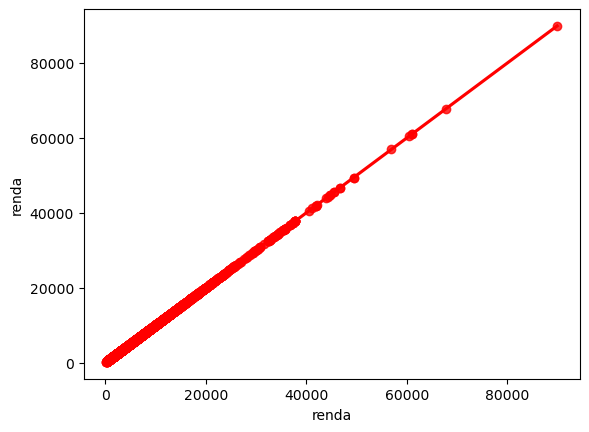

In [64]:
sns.regplot(x=previsao['renda'], y=previsao['renda'], color='red');

In [ ]:
#o rendimento esta alinhado, mas alguns valores estao acima da média.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [72]:
interesse= pd.DataFrame(previsao[interesse])
interesse.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,index,renda,tempo_emprego
0,False,True,1,36,8682,3369.24,3.575342
1,True,True,0,42,12830,6096.14,0.860274
2,True,True,2,31,2885,5658.98,8.065753
3,True,False,0,50,16168,7246.69,1.208219
4,False,False,0,52,12438,4017.37,13.873973


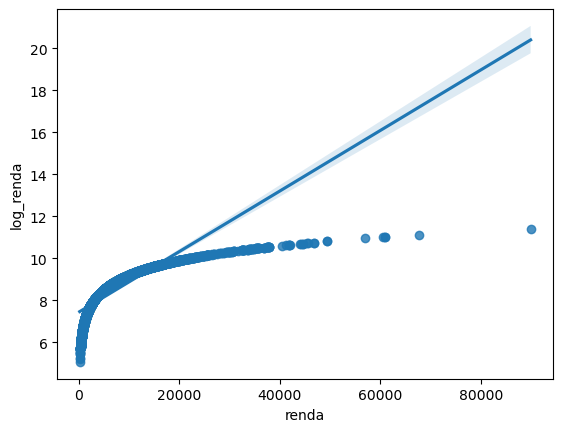

In [74]:
interesse_log = interesse.copy()
interesse_log['log_renda'] = np.log(interesse_log['renda'])

_ = sns.regplot(x='renda', y='log_renda', data= interesse_log)

In [76]:
interesse_log.corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,index,renda,tempo_emprego,log_renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.007542,0.063414,-0.087514,0.090529
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,-0.099683,0.029827,0.000112,0.045297
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,0.039734,0.009567,-0.074250,0.023743
idade,-0.157837,0.122667,-0.364303,1.000000,-0.047971,0.042570,0.323934,0.024712
index,-0.007542,-0.099683,0.039734,-0.047971,1.000000,-0.001740,-0.034574,0.002993
renda,0.063414,0.029827,0.009567,0.042570,-0.001740,1.000000,0.394235,0.835734
tempo_emprego,-0.087514,0.000112,-0.074250,0.323934,-0.034574,0.394235,1.000000,0.379556
log_renda,0.090529,0.045297,0.023743,0.024712,0.002993,0.835734,0.379556,1.000000


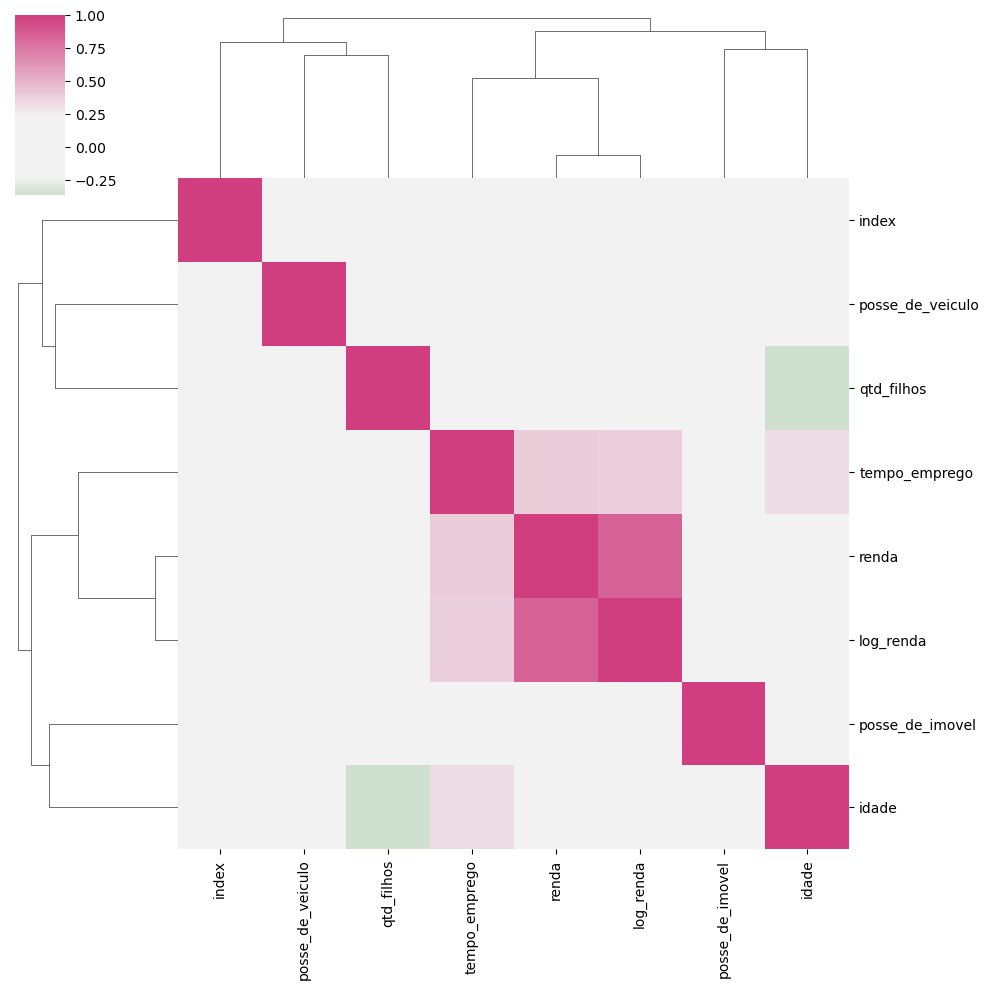

In [78]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(interesse_log.corr(), figsize=(10, 10), center = 0, cmap=cmap)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
#a diferença se mostrou mínima em relação aos demais graficos